In [22]:
import pandas as pd
import numpy as np
import json
import os
import re
import seaborn as sns


In [2]:
os.chdir('../')

In [3]:
from clustEHR.clustEHR_test import clustering
from clustEHR.clustEHR import sort_noise_full

## Functions

In [26]:
def get_noise_rat(file_name,data_set):
    with open('new_test/' + file_name + '.json') as f:
        data_dict = json.load(f)
    noise_list = sort_noise_full(data_dict['noise_var_ratio'],data_dict['data_sets'])
    noise_one = noise_list[data_set]
    return noise_one[1][0]/noise_one[0][0]

In [15]:
def create_dict(file_name,sets):
    equal = re.sub('_.*','',file_name)
    description = re.sub('.*equal_','',file_name)
    description = re.sub('_.*','',description)
    noise = re.sub('.*\d_','',file_name)
    if noise == 'noise':
        noise_rat = get_noise_rat(file_name,sets)
    else:
        noise_rat = 0
    out_file_list = os.listdir('new_test/'+file_name +'/data_' + str(sets))
    out = [i for i in out_file_list if 'output' in i][0]
    df = pd.read_csv('new_test/'+file_name +'/data_' + str(sets) +'/'+out+ '/cluster_data.csv')
    labels_df = pd.read_csv('new_test/'+file_name +'/data_' + str(sets) + '/'+out+'/labels.csv')
    labels = labels_df['code']
    accuracy = clustering(df,labels)
    if description: 
        k = len(labels.unique())
    else:
        k = re.findall(r'\d+',file_name)
        k = int(k[0])
    out_dict = {
        'equal':equal,
        'description':description,
        'noise':noise_rat,
        'k':k,
        'accuracy':accuracy
    }
    return out_dict

## Data

In [27]:
file_list = os.listdir('new_test')
file_list = [i for i in file_list if '.json' not in i]

In [28]:
results_list = [create_dict(i,j) for i in file_list for j in range(4)]

In [29]:
results_df = pd.DataFrame(results_list)

In [30]:
results_df

,equal,description,noise,k,accuracy
0,equal,false,1.000000,2,0.995000
1,equal,false,0.214286,2,0.822500
2,equal,false,0.120000,2,0.925000
3,equal,false,0.083333,2,0.915000
4,equal,false,0.000000,2,0.995000
...,...,...,...,...,...
155,unequal,true,0.083333,3,0.505155
156,unequal,true,0.000000,2,0.992579
157,unequal,true,0.000000,2,0.714563
158,unequal,true,0.000000,2,0.520737


## Plotting

In [31]:
true_desc = results_df[results_df['description'] == 'true']
false_desc = results_df[results_df['description'] == 'false']

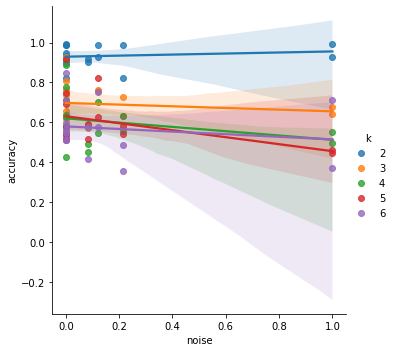

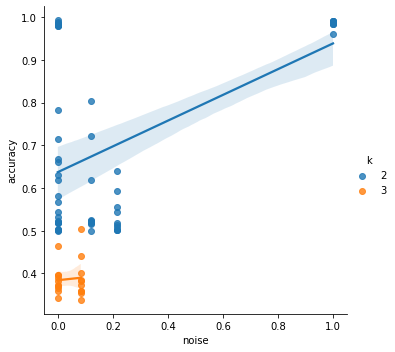

In [33]:
false_plot = sns.lmplot(x = 'noise',y='accuracy',data=false_desc,hue='k')
true_plot = sns.lmplot(x = 'noise',y='accuracy',data=true_desc,hue='k')

In [35]:
false_plot.savefig('new_test/false_plot.png')
true_plot.savefig('new_test/true_plot.png')

## Testing

In [11]:
for file_name in file_list:
    for sets in range(4):
        noise = re.sub('.*_','',file_name)
        print(noise)
        if noise == 'noise':
            noise_rat = get_noise_rat(file_name,sets)
        else:
            noise_rat = 0
        print(noise_rat)

noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.6

C:\Users\nonie\AppData\Local\Temp/ipykernel_28220/3476755580.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return noise_one[0][0]/noise_one[1][0]


8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf
noise
1.0
noise
4.666666666666666
noise
8.333333333333332
noise
12.0
noise
inf
noise
inf
noise
inf
noise
inf


In [12]:
file_list

['equal_false_2_noise',
 'equal_false_2_no_noise',
 'equal_false_3_noise',
 'equal_false_3_no_noise',
 'equal_false_4_noise',
 'equal_false_4_no_noise',
 'equal_false_5_noise',
 'equal_false_5_no_noise',
 'equal_false_6_noise',
 'equal_false_6_no_noise',
 'equal_true_2_noise',
 'equal_true_2_no_noise',
 'equal_true_3_noise',
 'equal_true_3_no_noise',
 'equal_true_4_noise',
 'equal_true_4_no_noise',
 'equal_true_5_noise',
 'equal_true_5_no_noise',
 'equal_true_6_noise',
 'equal_true_6_no_noise',
 'unequal_false_2_noise',
 'unequal_false_2_no_noise',
 'unequal_false_3_noise',
 'unequal_false_3_no_noise',
 'unequal_false_4_noise',
 'unequal_false_4_no_noise',
 'unequal_false_5_noise',
 'unequal_false_5_no_noise',
 'unequal_false_6_noise',
 'unequal_false_6_no_noise',
 'unequal_true_2_noise',
 'unequal_true_2_no_noise',
 'unequal_true_3_noise',
 'unequal_true_3_no_noise',
 'unequal_true_4_noise',
 'unequal_true_4_no_noise',
 'unequal_true_5_noise',
 'unequal_true_5_no_noise',
 'unequal_tru

In [14]:
re.sub('.*\d_','','unequal_true_6_no_noise')

'no_noise'